### Introducción a la Investigación Operativa y la Optimización

### • Clase 2  - Algoritmos de descenso

**Nazareno Faillace Mullen - Departamento de Matemática, FCEN, UBA**

### Algoritmos de descenso

_Idea_: a partir de un punto obtenido, escoger una dirección para dar el próximo paso

__Definición (dirección de descenso)__: sean $f:\mathbb{R}^n \rightarrow \mathbb{R}$, $\bar{x}\in\mathbb{R}^n$ y $d\in\mathbb{R}^n-\{0\}$, diremos que $d$ es una dirección de descenso para $f$ a partir de $\bar{x}$ si existe $\delta>0$ tal que $f(\bar{x}+td)<f(\bar{x}) \quad \forall t\in(0,\delta)$ 

__Teorema__: Si $\nabla f(\bar{x})d < 0$, entonces $d$ es dirección de descenso para $f$ a partir de $\bar{x}$

### __Algoritmo de descenso básico__

Dados: $f,\; x_0 \in \mathbb{R}^n,\; \varepsilon>0,\; k_{MAX}>0$ <br>
k = 0 <br>
REPETIR mientras $\nabla f(x_k) > \varepsilon$ y $k<k_{MAX}$ : <br>
&nbsp;&nbsp;&nbsp;&nbsp; Calcular $d_k$ tal que $\nabla f(x_k)^Td_k < 0$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Escoger $t_k>0$ tal que $f(x_k+t_kd_k)<f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Hacer $x_{k+1}=x_k + t_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $k = k+1$


## Método del gradiente - Funciones cuadráticas

Las funciones cuadráticas pueden escribirse en la forma:

$$f(x) = \frac{1}{2}x^T A x + bx + c$$

En este caso, el gradiente se calcula fácilmente: <br>
$$\nabla f(x) = Ax + b$$

En el método del gradiente, $d_k = -\nabla f(x_k)$

Si $A$ es definida positiva, se puede demostrar que $\varphi(t) = f(x_k + td_k)$ alcanza mínimo en:
$$ t^\ast = \dfrac{d_k^T d_k}{d_k^T A d_k}$$

Entonces, en cada iteración se puede calcular la longitud del paso óptimo.

### Pseudocódigo de Método de gradiente para funciones cuadráticas:

Método_gradiente($A$,$b$,$x_0$, $max\_iter$):<br>
&nbsp; &nbsp; $k$ = $0$ <br>
&nbsp; &nbsp; $x_k$ = $x_0$ <br>
&nbsp; &nbsp; $d_k$ = $-Ax_0-b$ &nbsp; &nbsp; `# Dirección del primer paso` <br> 
&nbsp; &nbsp; while $k\leq max\_iter$ and $\lVert d_{k}\rVert$ $> 10^{-8}$: <br>
&nbsp; &nbsp; &nbsp; &nbsp; $t = \dfrac{d^T d}{d^T A d}$ &nbsp; &nbsp; `# Determino la longitud del paso` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $x_{k}$ = $x_k + td_k$ &nbsp; &nbsp; `# Calculo el siguiente punto de la iteración ("doy el paso")`<br> 
&nbsp; &nbsp; &nbsp; &nbsp; $d_{k}$ = $- Ax_{k+1}-b$  &nbsp; &nbsp; `# Dirección del próximo paso` <br>
&nbsp; &nbsp; &nbsp; &nbsp; $k$ = $k+1$ <br>
&nbsp; &nbsp; DEVOLVER $x_{k}$

**Obs:** utilizar `np.linalg.norm(v)` para calcular la norma del vector `v`

## Ejercicio

1. Implementar el Método del gradiente para funciones cuadráticas en base al pseudocódigo anterior. Además de devolver la aproximación al mínimo, que también devuelva la cantidad de iteraciones.
2. Para la función cuadrática $f(x)=\frac{1}{2}x^TAx$ con $A$ dada más abajo, correr el Método del Gradiente: <br>
a) como fue implementado en el punto 1 <br>
b) con $\frac{1}{2}$ de longitud del paso óptimo <br>
c) en cada iteración multiplicar $t$  longitud de paso por un número aleatorio en (0,1] (`np.random.rand()` devuelve un float aleatorio) <br>
Probar con $x_0$ el vector de 1's (`np.ones(10)`) y un máximo de 10000 iteraciones. ¿Cuál se desempeña mejor?
3. Para $B$ dada más abajo, correr el Método del Gradiente con la implementación del Punto 1 para $f(x)=\frac{1}{2}x^T B x$, ¿en cuántas iteraciones termina? ¿Por qué?  

In [ ]:
import numpy as np

A = np.array([[8, 3, 3, 6, 5, 4, 4, 3, 6, 3],
             [3, 4, 2, 2, 2, 1, 3, 3, 3, 2],
             [3, 2, 5, 2, 1, 2, 4, 2, 4, 1],
             [6, 2, 2, 6, 3, 2, 4, 2, 4, 2],
             [5, 2, 1, 3, 5, 4, 1, 2, 4, 3],
             [4, 1, 2, 2, 4, 5, 1, 2, 5, 2],
             [4, 3, 4, 4, 1, 1, 6, 2, 4, 2],
             [3, 3, 2, 2, 2, 2, 2, 4, 4, 2],
             [6, 3, 4, 4, 4, 5, 4, 4, 8, 3],
             [3, 2, 1, 2, 3, 2, 2, 2, 3, 4]])

B = 2*np.eye(10)

## ¿Y si $f$ no es cuadrática?

## Métodos de búsqueda unidireccional

Dados $x,d\in\mathbb{R}^n$, lo que nosotros querríamos hacer es resolver el siguiente problema:
<center>minimizar $f(x+td)$</center>
<center>sujeto a: $t\geq0$</center>
Naturalmente, es un objetivo ambicioso pues no resulta una tarea fácil salvo que $f$ cumpla con características muy específicas. Veremos algoritmos que permiten aproximar a la solución de ese problema.

## Búsqueda inexacta - Condición de Armijo

A diferencia de la sección áurea, este algoritmo no busca minimizar $\varphi(t)=f(x_k+td)$ sino encontrar $t$ tal que haya una buena reducción en la función objetivo. Más específicamente, dados $x_k\in\mathbb{R}^n$, $d$ dirección de descenso y $\eta\in(0,1)$ busca $t$ que cumpla:
$$f(x_k+td) \leq f(x_k+td_k) + \eta \langle\nabla f(x_k) ,d\rangle t = \varphi(0) + \eta \varphi^\prime(0)t$$
es decir, la reducción debe ser proporcional al tamaño del paso.

Para que el paso no sea demasiado pequeño, agregamos una condición más a $t$. Dado $\beta>1$, $t$ no es un paso pequeño si cumple:
$$\varphi(\beta t) > \varphi(0) + \eta \varphi^\prime(0)(\beta t) $$
Es decir, que si incrementamos $t$ en un factor $\beta$, deja de cumplir la condición de Armijo.

### Interpretación gráfica (Armijo)

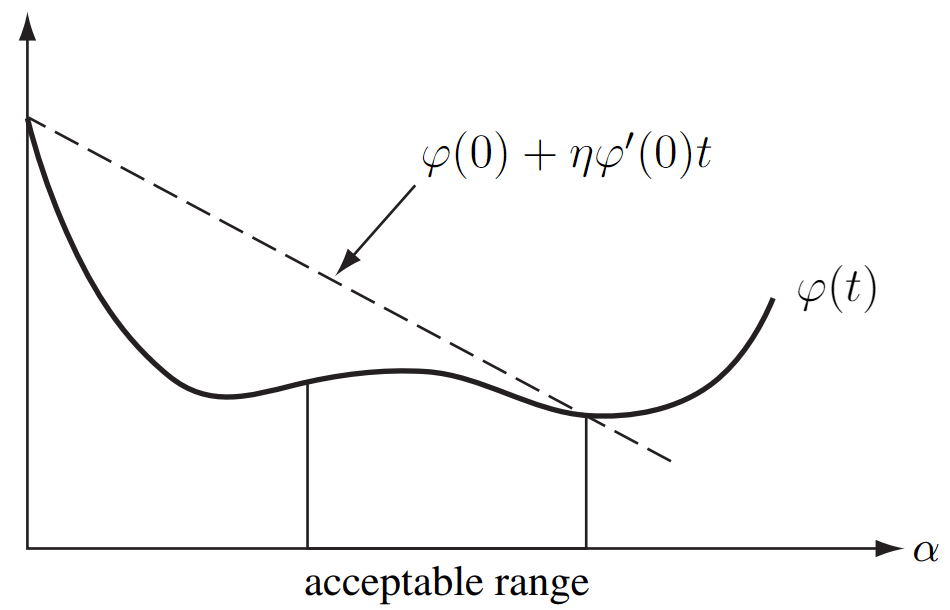

__Algoritmo de Búsqueda de Armijo__

Dados: $f\colon\mathbb{R}^n\rightarrow\mathbb{R},\;\bar{x}\in\mathbb{R}^n$, $d\in \mathbb{R^n}$ dirección de descenso, $\eta\in(0,1)$, $\beta > 1$<br>

$t=1$<br>
SI $f(\bar{x}+td) \leq f(\bar{x})+\eta t\nabla f(\bar{x})^Td$: <br>
&nbsp;&nbsp;&nbsp;&nbsp; REPETIR mientras $f(\bar{x}+td) \leq f(\bar{x})+\eta t\nabla f(\bar{x})^Td$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $t=\beta t$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; DEVOLVER $\dfrac{t}{\beta}$ <br>
SI NO: <br>
&nbsp;&nbsp;&nbsp;&nbsp; REPETIR mientras $f(\bar{x}+td) > f(\bar{x})+\eta t\nabla f(\bar{x})^Td$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $t= \dfrac{t}{\beta}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; DEVOLVER $t$

Valores usuales para los parámetros (Luenberger) : $\beta = 2\text{ (o $\beta = 10$)},\; \eta=0.2$ <br>
Otros valores usuales (Nocedal) : $\beta = 7, \;\eta = 0.45$

## Búsqueda inexacta - Condiciones de Wolfe

Wolfe brinda otra condición que acote inferiormente a $t$, la condición de curvatura:
$$\nabla f (x_k + td)^Td \geq \zeta \nabla f(x_k)^T d$$
donde $\zeta\in(\eta,1)$ con $\eta$ siendo la constante de la condición de Armijo. El lado izquierdo es $\varphi'(t)$, por lo que la condición impone que la pendiente de $\varphi$ en $t$ sea mayor que $\zeta$ veces la pendiente inicial.

Si $\varphi'$ es muy negativa $\Rightarrow$ se puede decrecer mucho en esta dirección <br>
Si $\varphi'$ no es muy negativa o es positiva $\Rightarrow$ terminar la búsqueda lineal, no se pueden lograr (muchas) mejoras

__Condiciones de Wolfe:__

$$\begin{array}{rcl} f(\bar{x}+\bar{t}d) &\leq& f(\bar{x})+c_1\bar{t}\nabla f(\bar{x})^Td \quad \text{(la condición de Armijo)} \\
\nabla f (\bar{x} + \bar{t}d)^Td &\geq& c_2 \nabla f(\bar{x})^T d \quad \text{(es decir: $\varphi^\prime(t)\geq c_2 \varphi^\prime(0)$)} \end{array} $$
Con $0<c_1<c_2<1$.

### Interpretación gráfica (Condiciones de Wolfe)

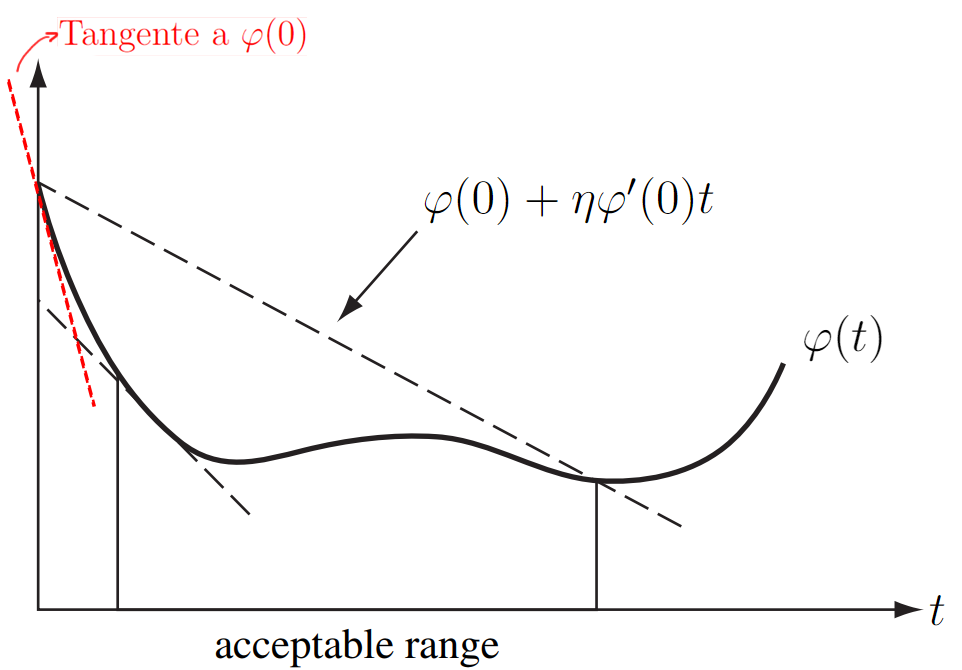

__Algoritmo de Búsqueda de Wolfe__

Dados: $f,\; \bar{x}\in\mathbb{R}^n,\; d$ dirección de descenso,$\; 0<c_1<c_2<1$ <br>
Definir $\alpha = 0,\; t=1,\; \beta = +\infty$ (`beta=np.inf`) <br>
REPETIR<br>
&nbsp;&nbsp;&nbsp;&nbsp; SI $f(\bar{x}+td) > f(\bar{x})+c_1t\nabla f(\bar{x})^Td$ :<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Definir $\beta=t,\; t=\frac{1}{2}(\alpha+\beta)$<br>
&nbsp;&nbsp;&nbsp;&nbsp; De lo contrario, si $\nabla f (\bar{x} + td)^Td < c_2 \nabla f(\bar{x})^T d$:<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Definir $\alpha=t ,\; t=\begin{cases} 2\alpha \quad \text{si } \beta=+\infty \\ \frac{1}{2}(\alpha+\beta) \quad \text{c.c.} \end{cases} $ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si no: PARAR <br>
DEVOLVER $t$

Valores usuales para parámetros (Nocedal) : $c_1= 0.5,\; c_2=0.75$ <br>
El comando `break` de Python permite salir de un ciclo `while` o `for`

__Lema:__ sean $f:\mathbb{R}^n\rightarrow \mathbb{R}$, $f\in C^1$, $\bar{x}\in\mathbb{R}^n$ y $d$ una dirección de descenso, entonces una de las siguientes dos situaciones pueden ocurrir con el método antes expuesto para las condiciones de Wolfe: <br>
i) El procedimiento termina en una cantidad finita de pasos, devolviendo un valor $t$ que satisface las condiciones de Wolfe <br>
ii) El procedimiento no termina: el parámetro $\beta$ nunca toma un valor finito, $\alpha$ se vuelve positivo en la primera iteración y se duplica con las iteraciones siguientes, y $f(x+td)\rightarrow -\infty$

# Métodos de Optimización Irrestricta 

## Método del Gradiente (o de Cauchy)

En este método, se toma como dirección de descenso:
$$d = -\nabla f(x)$$
Observar que, si $\nabla f(x) \neq 0$, efectivamente $d$ es dirección de descenso:
$$\nabla f(x)^T d = -\left\Vert \nabla f(x) \right\Vert ^2 < 0$$

__Algoritmo del Método del Gradiente__

Dados: $f, x^0 \in \mathbb{R}^n,\; \varepsilon>0,\; k_{MAX}>0 $ <br>
$k = 0$ <br>
REPETIR mientras $\lVert\nabla f(x_{k})\rVert > \varepsilon$ y $k<k_{MAX}$ : <br>
&nbsp;&nbsp;&nbsp;&nbsp; Definir $d_k = -\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Obtener $t_k>0$ tal que $f(x_k+t_kd_k)<f(x_k)$ (con Armijo o Wolfe) <br>
&nbsp;&nbsp;&nbsp;&nbsp; Hacer $x_{k+1} = x_k + t_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $k = k+1$

## Consignas

Implementar una función para cada una de las siguientes tareas:
* devolver la longitud del paso utilizando sección áurea
* devolver la longitud de un paso que cumpla con la Condición de Armijo (+ condicion para que $t$ no sea demasiado pequeño)
* [OPCIONAL] devolver la longitud de un paso que cumpla con las Condiciones de Wolfe
* encontrar mínimo utilizando el Método del Gradiente

La última tres deben tener `metodo` como un input opcional que permita elegir qué metodo utilizar (sección áurea, Armijo o Wolfe) para encontrar la longitud del paso. Deben imprimir la cantidad de iteraciones que realizaron, el minimizador y el valor de la función en el mismo. 

Aplicar Método del Gradiente sobre la función de Rosenbrock en 2 dimensiones. El minimizador de esta función es $x^*=(1,1)$ y $f(x^*)=0$

También pueden probar con la función $f(x_1,x_2)= 2(e^{(-x_1^2-x_2^2)} - e^{(-(x_1-1)^2-(x_2-1)^2)})$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
def rosenbrock(x):
    """
    minimiser : x = (1,..., 1)
    """
    d = np.shape(x)[0]
    return sum(100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2 for i in range(d-1))

def resta_exponenciales(x):
    s1 = np.exp(-x[0] ** 2 - x[1] ** 2)
    s2 = np.exp(-(x[0] - 1) ** 2 - (x[1] - 1) ** 2)
    return (s1 - s2) * 2

Para graficar las funciones pueden usar la siguiente función `plot_function`:

In [ ]:
def plot_fun(f, limites, points=None):
    """
    f : función a graficar
    limites : toma una tupla (x1,x2,y1,y2) de los límites del gráfico: grafica en el dominio [x1,x2] x [y1,y2]
    points : lista de puntos a graficar sobre la superficie; se ingresa como una lista de tuplas (x,y,z) 
    """
    init_notebook_mode(connected=True)

    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    data = [go.Surface(x=x, y=y, z=Z)]
    if points is not None:
        for p in points:
            data.append(go.Scatter3d(x=[p[0]], y=[p[1]], z=[p[2]], mode='markers'))
    fig = go.Figure(data=data)
    iplot(fig)

In [ ]:
plot_fun(resta_exponenciales, limites=(-3,3,-3,3))

Mientras que para graficar las curvas de nivel de una función, se puede utilizar la siguiente:

In [ ]:
%matplotlib notebook

def curvas_nivel(f, limites, levels=10):
    """ 
    Función que grafica curvas de nivel.
    f : es la función a graficar (tiene que ir de R2 en R)
    limites: es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    levels : cantidad de curvas de nivel a graficar
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    plt.contour(X,Y,Z, cmap='plasma', levels=levels)
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [ ]:
curvas_nivel(resta_exponenciales, (-2,3,-2,3))